In [1]:
import numpy as np
from scipy.fft import fft, ifft, fftshift, ifftshift
import matplotlib.pyplot as plt
from ipywidgets import interact, Layout
import ipywidgets as widgets
from IPython.display import display, clear_output
import scipy.io
import io
import scipy
from scipy import signal
from scipy.io.wavfile import write
from IPython.display import display, Audio, clear_output
from scipy.signal import convolve, kaiser_atten, welch, remez, firwin2, freqz
import requests
import warnings
warnings.filterwarnings('ignore')
print("Libraries added successfully!")


Libraries added successfully!


In [2]:
# Create the array X
X = np.arange(-2, 3)  # equivalent to MATLAB's -2:2

# Apply fftshift and ifftshift
fftshifted_X = np.fft.fftshift(X)
ifftshifted_X = np.fft.ifftshift(X)

# Double fftshift and a combination of fftshift and ifftshift
Y = np.fft.fftshift(np.fft.fftshift(X))
Z = np.fft.ifftshift(np.fft.fftshift(X))

# Check if arrays are equal
X_equals_Y = np.array_equal(X, Y)
X_equals_Z = np.array_equal(X, Z)

print(f"X equals Y: {X_equals_Y}")
print(f"X equals Z: {X_equals_Z}")

X equals Y: False
X equals Z: True


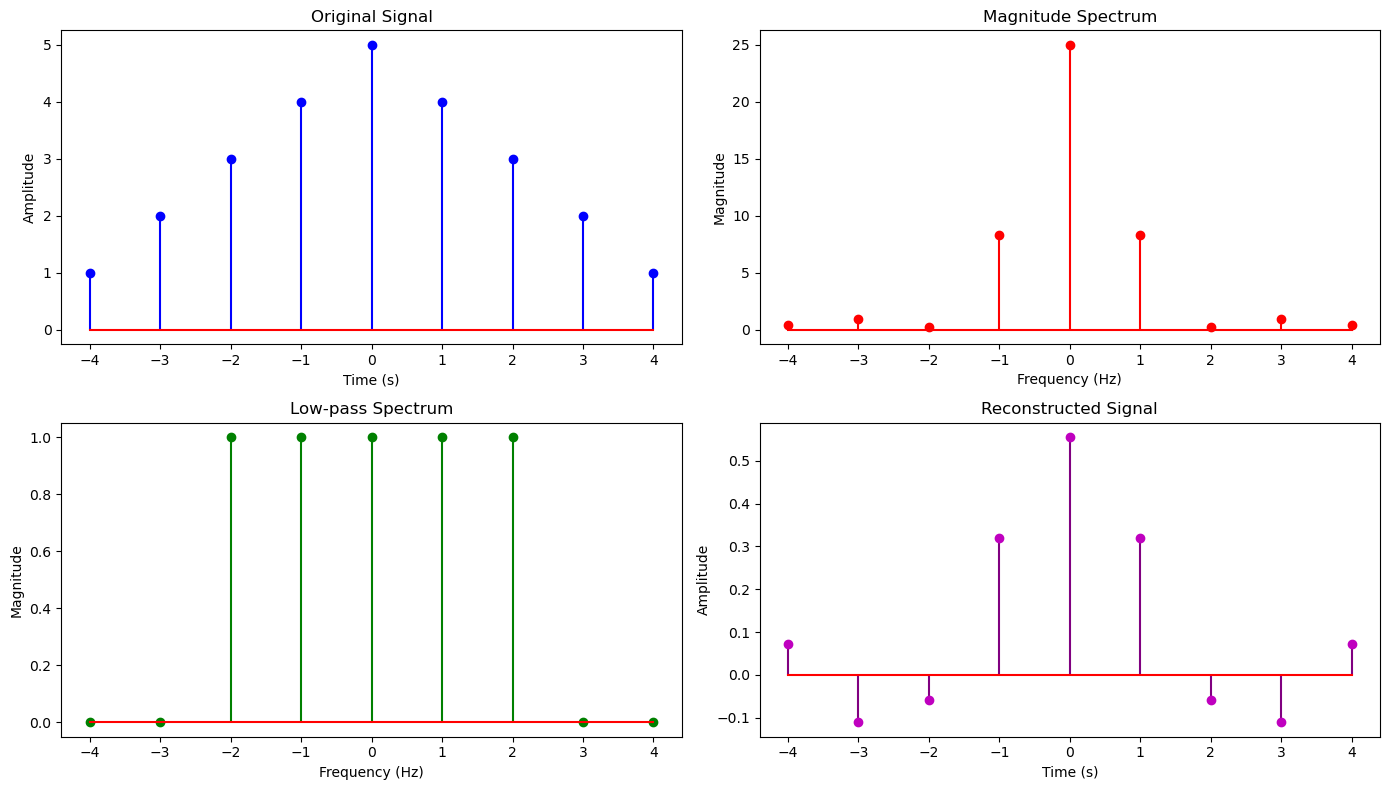

In [3]:
# First part: Original signal and its FFT
xb = np.array([1, 2, 3, 4, 5, 4, 3, 2, 1])
x = ifftshift(xb)
X = fft(x)
Xb = fftshift(X)  # Spectrum with DC component in the center

# Second part: Low-pass filter effect
Xb_low_pass = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])
X_low_pass = ifftshift(Xb_low_pass)
x_low_pass = ifft(X_low_pass)
xb_low_pass = fftshift(x_low_pass.real)

# Function to plot
def plot_signals():
    fig1, axs = plt.subplots(2, 2, figsize=(14, 8))

    time_range = np.arange(-4, 5)
    
    axs[0, 0].stem(time_range, xb, linefmt='blue', markerfmt='bo', basefmt='r-')
    axs[0, 0].set_title('Original Signal')
    axs[0, 0].set_xlabel('Time (s)')
    axs[0, 0].set_ylabel('Amplitude')

    axs[0, 1].stem(time_range, np.abs(Xb), linefmt='red', markerfmt='ro', basefmt='r-')
    axs[0, 1].set_title('Magnitude Spectrum')
    axs[0, 1].set_xlabel('Frequency (Hz)')
    axs[0, 1].set_ylabel('Magnitude')

    axs[1, 0].stem(time_range, Xb_low_pass, linefmt='green', markerfmt='go', basefmt='r-')
    axs[1, 0].set_title('Low-pass Spectrum')
    axs[1, 0].set_xlabel('Frequency (Hz)')
    axs[1, 0].set_ylabel('Magnitude')

    axs[1, 1].stem(time_range, xb_low_pass, linefmt='purple', markerfmt='mo', basefmt='r-')
    axs[1, 1].set_title('Reconstructed Signal')
    axs[1, 1].set_xlabel('Time (s)')
    axs[1, 1].set_ylabel('Amplitude')

    plt.tight_layout()
    plt.show()

plot_signals()


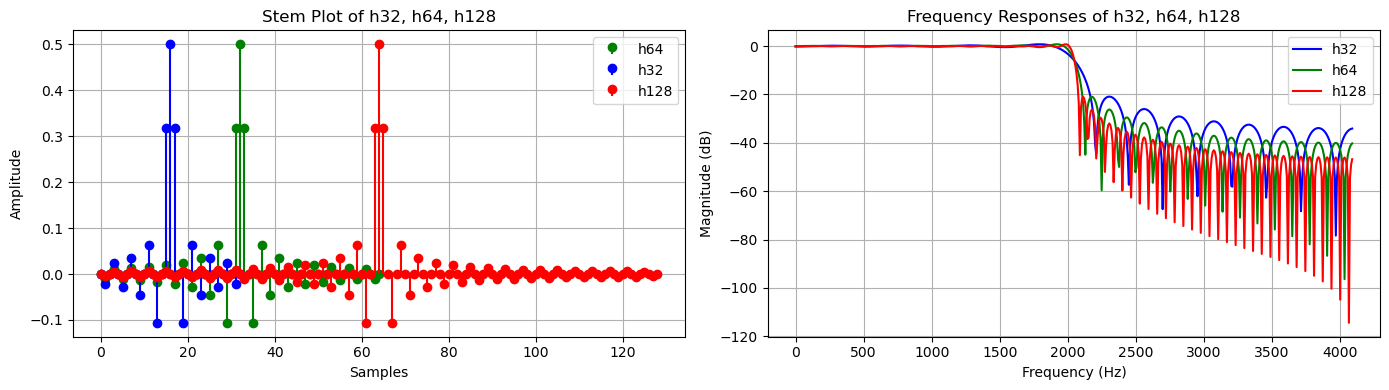

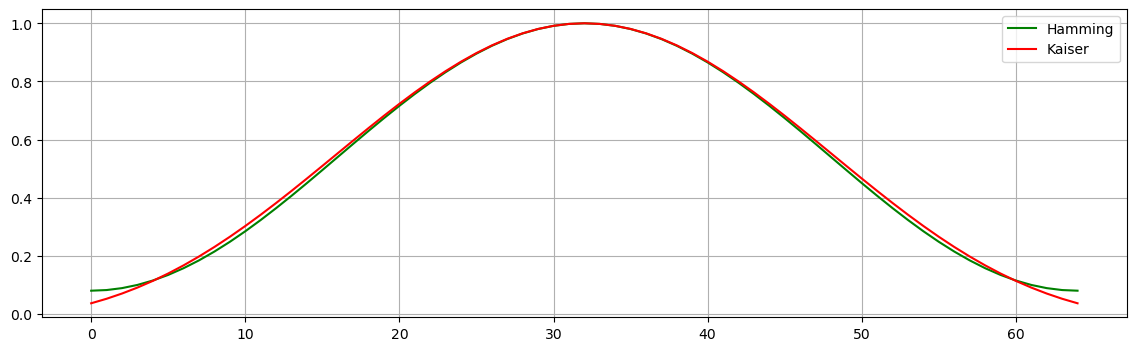

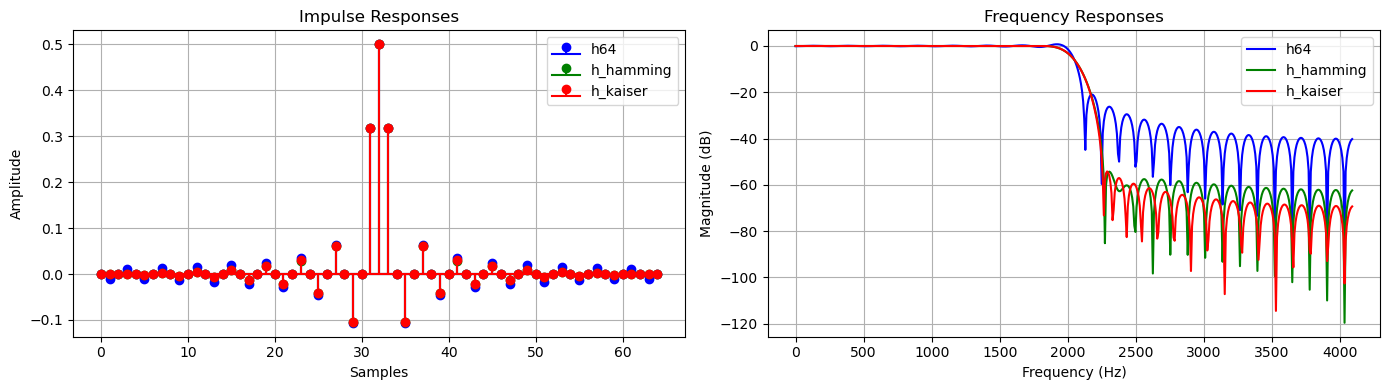

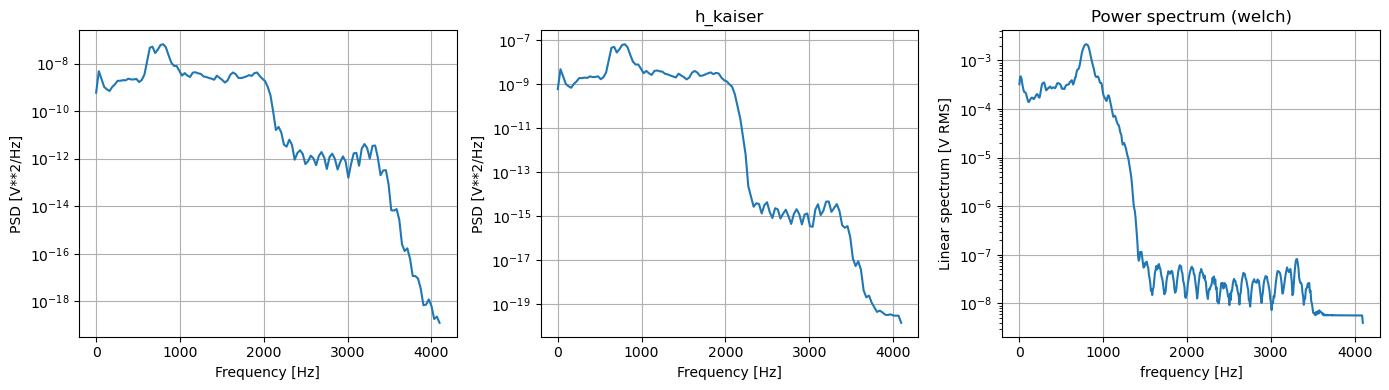

In [4]:
#6
with open('../files/sima.txt') as f:
    s = [float(x) for x in f]
s=np.array(s)
Fs=8192


# 7
f, Pxx = scipy.signal.welch(s, Fs)
#plt.figure(); plt.semilogy(f, Pxx); plt.grid(True); plt.xlabel('Frequency [Hz]'); plt.ylabel('PSD [V**2/Hz]')

# 8-9
N = Fs // 2  # Adjusted for Python indexing, assuming Fs is even
H = np.concatenate((np.ones(N//4), np.zeros(N//2), np.ones(N//4)))

# 10-14
h = np.fft.ifft(H, n=N).real
h = np.fft.fftshift(h)  # Equivalent to MATLAB's circshift for centering the impulse response

# 15-17
h32 = h[N//2-16:N//2+17]
h64 = h[N//2-32:N//2+33]
h128 = h[N//2-64:N//2+65]

# 18 - Stem plot for h32, h64, h128

# Create a 1x2 grid of subplots: one row, two columns
fig, axs = plt.subplots(1, 2, figsize=(14, 4))  # Adjust the figsize to suit your needs

# Plot stem plots on the left subplot (axs[0])
axs[0].stem(range(len(h64)), h64, basefmt=" ", linefmt='g-', markerfmt='go', label='h64')
axs[0].stem(range(len(h32)), h32, basefmt=" ", linefmt='b-', markerfmt='bo', label='h32')
axs[0].stem(range(len(h128)), h128, basefmt=" ", linefmt='r-', markerfmt='ro', label='h128')
axs[0].set_title('Stem Plot of h32, h64, h128')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')
axs[0].grid(True)
axs[0].legend()

# 19 - Frequency response of h64
w, h = scipy.signal.freqz(h64)
#plt.figure(); plt.plot(w / np.pi * (Fs / 2), np.abs(h)); plt.title('Frequency Response of h64');plt.xlabel('Frequency (Hz)');plt.ylabel('Magnitude');plt.grid()

# 20 - For visualizing the frequency responses of h32, h64, and h128 together
# Define a list of colors corresponding to each filter
colors = ['b', 'g', 'r']  # Blue for h32, Green for h64, Red for h128

for filt, label, color in zip([h32, h64, h128], ['h32', 'h64', 'h128'], colors):
    w, h = scipy.signal.freqz(filt)
    axs[1].plot(w / np.pi * (Fs / 2), 20 * np.log10(abs(h)), label=label, color=color)
axs[1].set_title('Frequency Responses of h32, h64, h128')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Magnitude (dB)')
axs[1].grid(True)
axs[1].legend()

# Display the figure with plots side by side
plt.tight_layout()


# 22-26
wh = np.hamming(len(h64))
wk = np.kaiser(len(h64), 5)
plt.figure(figsize=(14, 4)); plt.plot(wh, 'g', label='Hamming'); plt.plot(wk, 'r', label='Kaiser'); plt.legend(); plt.grid(True)

# 27-30
h_hamming = h64 * wh
h_kaiser = h64 * wk

# 31 `wvtool` equivalent visualization
# Plot the impulse responses
# Create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 4))  # Adjust the figsize to suit your needs

# Impulse Responses Plot on the left subplot (axs[0])
axs[0].stem(range(len(h64)), h64, basefmt="b", linefmt='b-', markerfmt='bo', label='h64')
axs[0].stem(range(len(h_hamming)), h_hamming, basefmt="g", linefmt='g-', markerfmt='go', label='h_hamming')
axs[0].stem(range(len(h_kaiser)), h_kaiser, basefmt="r", linefmt='r-', markerfmt='ro', label='h_kaiser')
axs[0].set_title('Impulse Responses')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')
axs[0].legend()
axs[0].grid(True)

# Frequency Responses Plot on the right subplot (axs[1])
colors = ['b', 'g', 'r']  # Blue for h64, Green for h_hamming, Red for h_kaiser
for filt, label, color in zip([h64, h_hamming, h_kaiser], ['h64', 'h_hamming', 'h_kaiser'], colors):
    w, h = scipy.signal.freqz(filt)
    axs[1].plot(w / np.pi * (Fs / 2), 20 * np.log10(abs(h)), label=label, color=color)
axs[1].set_title('Frequency Responses')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Magnitude (dB)')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()


# 32-38 Filtering and plotting PSD
y_rect = np.convolve(s, h64, mode='same')
f, Pxx = scipy.signal.welch(y_rect, Fs)
#plt.figure();plt.grid(True); plt.semilogy(f, Pxx); plt.xlabel('Frequency [Hz]'); plt.ylabel('PSD [V**2/Hz]'); plt.title('h64')

fig, axs = plt.subplots(1, 3, figsize=(14, 4))  # Adjust the figsize to suit your needs

axs[0].semilogy(f, Pxx); axs[0].grid(True); axs[0].set_xlabel('Frequency [Hz]'); axs[0].set_ylabel('PSD [V**2/Hz]')

y_hamm = np.convolve(s, h_hamming, mode='same')
f, Pxx = scipy.signal.welch(y_hamm, Fs)
#plt.figure();plt.grid(True); plt.semilogy(f, Pxx); plt.xlabel('Frequency [Hz]'); plt.ylabel('PSD [V**2/Hz]'); plt.title('h_hamming')

y_kais = np.convolve(s, h_kaiser, mode='same')
f, Pxx = scipy.signal.welch(y_kais, Fs)
axs[1].grid(True); axs[1].semilogy(f, Pxx); axs[1].set_xlabel('Frequency [Hz]'); axs[1].set_ylabel('PSD [V**2/Hz]'); axs[1].set_title('h_kaiser')

# 40-44  Parks-McClellan low-pass filter
freq = np.array([0, 0.10, 0.15, 0.5]) * Fs  # Scale frequencies correctly
gain = [1, 1, 0, 0]

# Call firwin2 with corrected parameters and using the `fs` parameter
hpm = scipy.signal.firwin2(65, freq, gain, fs=Fs)
s_pm = np.convolve(s, hpm, 'same')

# Plotting or analyzing the filtered signals (y_rect, y_hamm, y_kais, s_pm) can be done similarly
# For example, to plot the PSD:
f, Pxx_spec = scipy.signal.welch(s_pm, Fs, 'flattop', 1024, scaling='spectrum')
axs[2].semilogy(f, np.sqrt(Pxx_spec))
axs[2].set_xlabel('frequency [Hz]')
axs[2].grid(True)
axs[2].set_ylabel('Linear spectrum [V RMS]')
axs[2].set_title('Power spectrum (welch)')

plt.tight_layout()


# 45-46 Playing sound (s and s_pm assumed as original and filtered signal)
#sd.play(20 * s, Fs); sd.wait()
# sd.play(20 * s_lp, Fs); sd.wait()  # Uncomment and adjust variable name as needed for the filtered signal

In [5]:
# Replace the URL with the URL of the raw content
url = "https://raw.githubusercontent.com/ntua-el17840/Interactive-Digital-Communications/main/test-book/_static/sima.txt"
response = requests.get(url)

# Split the response text by new lines and convert each line to a float
s = np.array([float(line) for line in response.text.splitlines()])

Fs=8192
f, Pxx = scipy.signal.welch(s, Fs)
N = Fs // 2 
H = np.concatenate((np.ones(N//4), np.zeros(N//2), np.ones(N//4)))
h = np.fft.ifft(H, n=N).real
h = np.fft.fftshift(h)
h32 = h[N//2-16:N//2+17]
h64 = h[N//2-32:N//2+33]
h128 = h[N//2-64:N//2+65]

# Assuming H is defined and calculated as before
H = np.hstack((np.ones(int(Fs/8)), np.zeros(int(Fs-Fs/4)), np.ones(int(Fs/8))))
h = np.real(np.fft.ifft(H))
middle = int(len(h)/2)
h = np.hstack((h[middle:], h[:middle]))
h32 = h[middle-16:middle+16]
h64 = h[middle-32:middle+32]
h128 = h[middle-64:middle+64]
h160 = h[middle-80:middle+80]
h256 = h[middle-128:middle+128]

h_variants = {
    'h32': h[middle-16:middle+16],
    'h64': h[middle-32:middle+32],
    'h128': h[middle-64:middle+64],
    'h160': h[middle-80:middle+80],
    'h256': h[middle-128:middle+128],
}

output2 = widgets.Output()
output2.layout = Layout(width='auto', margin='0 auto')

# Function to plot
def plot_stem(h_key):
    with output2:
        clear_output(wait=True)  # Clear the previous plots
        h_data = h_variants[h_key]
        x_values = np.arange(len(h_data))
        plt.close('all')  # Close all existing figures
        fig, ax = plt.subplots()
        markerline, stemlines, baseline = ax.stem(x_values, h_data, '-.')
        plt.setp(baseline, 'color', 'k', 'linewidth', 2)
        plt.title('Stem plot of selected filter')
        plt.xlabel('Index')
        plt.ylabel('Amplitude')
        plt.show()

# HTML Label
html_label = widgets.HTML(
    value="<h2 style='font-weight: bold; font-size: 30px; text-align: center;'>Filter Visualization</h2>"
)

# Setup the widgets
dropdown = widgets.Dropdown(options=list(h_variants.keys()), value='h32', description='Filter:')

# Function that updates the plot based on dropdown
def update_plot(change):
    plot_stem(change['new'])

# Observe dropdown for changes
dropdown.observe(update_plot, names='value')

# VBox layout to align items
vbox_layout = Layout(display='flex', flex_flow='column', align_items='center', justify_content='space-between')
ui = widgets.VBox([html_label, dropdown], layout=vbox_layout)

# Group the dropdown, output widget, and HTML label in a vertical box layout
vbox_final = widgets.VBox([ui, output2])

# Display the final VBox
display(vbox_final)

# Initial call to display the plot
plot_stem(dropdown.value)  # Use the dropdown's value


In [6]:
# Compute frequency responses
freq32, resp32 = signal.freqz(h32)
freq64, resp64 = signal.freqz(h64)
freq128, resp128 = signal.freqz(h128)
freq160, resp160 = signal.freqz(h160)
freq256, resp256 = signal.freqz(h256)

# Function to apply window and compute frequency responses
def compute_filtered_freq_responses(window_type='Rectangular'):
    freqs, resps = {}, {}
    for filt_size in [32, 64, 128, 160, 256]:
        filt_name = f'h{filt_size}'
        filt = eval(filt_name)
        
        if window_type == 'Hamming':
            filt = filt * np.hamming(filt_size)
        elif window_type == 'Kaiser':
            beta = 14  # Example beta value for Kaiser window, adjust as needed
            filt = filt * np.kaiser(filt_size, beta)
            
        freqs[filt_name], resps[filt_name] = signal.freqz(filt)
    return freqs, resps

# Initial computation with Rectangular (no window)
freqs, resps = compute_filtered_freq_responses()

output3 = widgets.Output()
output3.layout = Layout(width='auto', margin='0 auto')

def update_plot1(change=None):
    window_type = window_type_dropdown.value
    freqs, resps = compute_filtered_freq_responses(window_type)
    
    with output3:
        clear_output(wait=True)
        plt.figure(figsize=(10, 5))
        for filt in ['h32', 'h64', 'h128', 'h160', 'h256']:
            if checkboxes1[filt].value:
                w, h = freqs[filt], resps[filt]
                plt.plot(0.5 * Fs * w / np.pi, 20 * np.log10(np.abs(h)), label=filt)
        plt.title(f'Frequency Response with {window_type} Window')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Magnitude (dB)')
        plt.xscale('linear')
        plt.grid(True)
        plt.legend()
        plt.show()

# Create checkboxes for each filter
checkboxes1 = {f'h{size}': widgets.Checkbox(value=True, description=f'h{size}') for size in [32, 64, 128, 160, 256]}
for cb in checkboxes1.values():
    cb.observe(update_plot1, names='value')

# Dropdown for selecting the window type
window_type_dropdown = widgets.Dropdown(
    options=['Rectangular', 'Hamming'],
    value='Rectangular',
    description='Window Type:',
)
window_type_dropdown.observe(update_plot1, names='value')

# HTML Label
html_label = widgets.HTML(
    value="<h2 style='font-weight: bold; font-size: 30px; text-align: center;'>Filter Frequency Response Visualization</h2>"
)

# VBox layout to align items
vbox_layout = Layout(display='flex', flex_flow='column', align_items='center', justify_content='space-between')
vbox_checkboxes = widgets.VBox(list(checkboxes1.values()) + [window_type_dropdown], layout=vbox_layout)

# Combine everything into a final VBox with the layout
vbox_final = widgets.VBox([html_label, vbox_checkboxes, output3], layout=vbox_layout)

# Display the final layout
display(vbox_final)

# Initial plot update to show default visualization
update_plot1()

In [7]:
filters = {
    'Equiripple Filter 32+1': signal.remez(33, [0, 0.1*Fs, 0.15*Fs, 0.5*Fs], [1, 0], Hz=Fs),
    'Equiripple Filter 64+1': signal.remez(65, [0, 0.1*Fs, 0.15*Fs, 0.5*Fs], [1, 0], Hz=Fs),
    'Equiripple Filter 128+1': signal.remez(129, [0, 0.1*Fs, 0.15*Fs, 0.5*Fs], [1, 0], Hz=Fs),
    'Equiripple Filter 160+1': signal.remez(161, [0, 0.1*Fs, 0.15*Fs, 0.5*Fs], [1, 0], Hz=Fs),
    'Equiripple Filter 256+1': signal.remez(257, [0, 0.1*Fs, 0.15*Fs, 0.5*Fs], [1, 0], Hz=Fs)
}

output_plot2 = widgets.Output()
output_plot2.layout = Layout(width='auto', margin='0 auto')

# Function to update the plot based on selected filters
def update_plot2(change=None):
    selected_filters = [cb.description for cb in checkboxes2 if cb.value]
    with output_plot2:
        clear_output(wait=True)
        plt.figure(figsize=(10, 5))
        for filter_name in selected_filters:
            filter_coeffs = filters[filter_name]
            w, h = signal.freqz(filter_coeffs, worN=8000)
            plt.semilogy(w * Fs / (2 * np.pi), np.abs(h), label=filter_name)
        plt.title('Frequency Response')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Gain')
        plt.legend()
        plt.grid(True)
        plt.show()

checkboxes2 = [widgets.Checkbox(value=True, description=name) for name in filters.keys()]
for cb in checkboxes2:
    cb.observe(update_plot2, names='value')

# HTML Label
html_label = widgets.HTML(
    value="<h2 style='font-weight: bold; font-size: 30px; text-align: center;'>Equiripple Filter Frequency Response</h2>"
)

# VBox layout to align items
vbox_layout = Layout(display='flex', flex_flow='column', align_items='center', justify_content='space-between')
vbox_checkboxes = widgets.VBox([widgets.Label('Select Equiripple Filter Length:')] + checkboxes2, layout=vbox_layout)

# Combine everything into a final VBox with the layout
vbox_final = widgets.VBox([html_label, vbox_checkboxes, output_plot2], layout=vbox_layout)

# Display the final layout
display(vbox_final)


# Initial plot update to show default visualization
update_plot2()


In [8]:
filters3 = {
    'Equiripple Filter 32+1': signal.remez(33, [0, 0.11*Fs, 0.12*Fs, 0.5*Fs], [1, 0], Hz=Fs),
    'Equiripple Filter 64+1': signal.remez(65, [0, 0.11*Fs, 0.12*Fs, 0.5*Fs], [1, 0], Hz=Fs),
    'Equiripple Filter 128+1': signal.remez(129, [0, 0.11*Fs, 0.12*Fs, 0.5*Fs], [1, 0], Hz=Fs),
    'Equiripple Filter 160+1': signal.remez(161, [0, 0.11*Fs, 0.12*Fs, 0.5*Fs], [1, 0], Hz=Fs),
    'Equiripple Filter 256+1': signal.remez(257, [0, 0.11*Fs, 0.12*Fs, 0.5*Fs], [1, 0], Hz=Fs)
}

output_plot3 = widgets.Output()

# Function to update the plot based on selected filters
def update_plot3(change=None):
    selected_filters = [cb.description for cb in checkboxes3 if cb.value]
    with output_plot3:
        clear_output(wait=True)
        plt.figure(figsize=(10, 5))
        for filter_name in selected_filters:
            filter_coeffs = filters3[filter_name]
            w, h = signal.freqz(filter_coeffs, worN=8000)
            plt.semilogy(w * Fs / (2 * np.pi), np.abs(h), label=filter_name)
        plt.title('Frequency Response')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Gain')
        plt.legend()
        plt.grid(True)
        plt.show()

checkboxes3 = [widgets.Checkbox(value=True, description=name) for name in filters3.keys()]
for cb in checkboxes3:
    cb.observe(update_plot3, names='value')

# HTML Label
html_label3 = widgets.HTML(
    value="<h2 style='font-weight: bold; font-size: 30px; text-align: center;'>Equiripple Filter Frequency Response</h2>"
)

# VBox layout to align items
vbox_layout3 = Layout(display='flex', flex_flow='column', align_items='center', justify_content='space-between')
vbox_checkboxes3 = widgets.VBox([widgets.Label('Select Equiripple Filter Length:')] + checkboxes3, layout=vbox_layout3)

# Combine everything into a final VBox with the layout
vbox_final3 = widgets.VBox([html_label3, vbox_checkboxes3, output_plot3], layout=vbox_layout3)

# Display the final layout
display(vbox_final3)

# Initial plot update to show default visualization
update_plot3()



In [9]:
lp_filtersl = {
    'lpass32': signal.remez(33, [0, 0.1*Fs, 0.15*Fs, 0.5*Fs], [1, 0], Hz=Fs),
    'lpass64': signal.remez(65, [0, 0.1*Fs, 0.15*Fs, 0.5*Fs], [1, 0], Hz=Fs),
    'lpass128': signal.remez(129, [0, 0.1*Fs, 0.15*Fs, 0.5*Fs], [1, 0], Hz=Fs),
    'lpass160': signal.remez(161, [0, 0.1*Fs, 0.15*Fs, 0.5*Fs], [1, 0], Hz=Fs),
    'lpass256': signal.remez(257, [0, 0.1*Fs, 0.15*Fs, 0.5*Fs], [1, 0], Hz=Fs)
}

# Prepare audio data
audio_data = {}

for name, lp_filter_coeffs in lp_filtersl.items():
    # Apply the filter to the signal
    s_lp_filtered = signal.convolve(s, lp_filter_coeffs, mode='same') / np.sum(lp_filter_coeffs)
    
    # Normalize the filtered signal to prevent clipping
    s_lp_filtered_normalized = np.int16((s_lp_filtered / np.max(np.abs(s_lp_filtered))) * 32767)
    
    # Write to an in-memory file
    audio_buf = io.BytesIO()
    write(audio_buf, Fs, s_lp_filtered_normalized)
    audio_buf.seek(0)  # Go back to the beginning of the BytesIO object
    
    # Store the audio buffer
    audio_data[name] = audio_buf

# Function to display the frequency response of the filtered signal
def plot_freq_response(filter_name):
    with plot_output:
        clear_output(wait=True)
        # Apply the filter to the original signal
        s_lp_filtered = signal.convolve(s, lp_filtersl[filter_name], mode='same') / np.sum(lp_filtersl[filter_name])
        
        # Calculate FFT
        freqs = np.fft.rfftfreq(len(s_lp_filtered), 1/Fs)
        fft_mag = np.abs(np.fft.rfft(s_lp_filtered))
        
        # Convert magnitude to dB
        fft_mag_db = 20 * np.log10(fft_mag)
        
        plt.figure(figsize=(10, 5))
        plt.plot(freqs, fft_mag_db)
        plt.title(f'Frequency Response of Filtered Signal with {filter_name}')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Magnitude (dB)')
        plt.grid(True)
        plt.xlim(0, Fs/2)
        plt.show()

# Audio playback function
def show_audio_player(filter_name):
    with audio_output:
        clear_output(wait=True)
        display(Audio(data=audio_data[filter_name].getvalue(), rate=Fs))

# Widget setup
filter_dropdown = widgets.Dropdown(
    options=[(name, name) for name in lp_filtersl.keys()],
    value='lpass32',
    description='Filter:'
)

plot_output = widgets.Output()
audio_output = widgets.Output()

def on_filter_change(change):
    filter_name = change['new']
    plot_freq_response(filter_name)
    show_audio_player(filter_name)

filter_dropdown.observe(on_filter_change, names='value')

# HTML Label for enhanced UI
html_label = widgets.HTML(
    value="<h2 style='font-weight: bold; font-size: 30px; text-align: center;'>Low Pass Filter Application and Audio Playback</h2>"
)

# VBox layout for alignment and presentation
vbox_layout = widgets.Layout(display='flex', flex_flow='column', align_items='center', justify_content='space-between')
vbox_final5 = widgets.VBox([html_label, filter_dropdown, plot_output, audio_output], layout=vbox_layout)

# Display the final layout
display(vbox_final5)

# Initialize
on_filter_change({'new': filter_dropdown.value})


In [10]:
# Sampling frequency
Fs = 8192  
# Signal duration
t = np.arange(0, 1.0, 1/Fs)  
# Re-define the signal with new frequencies
s_new = np.sin(2*np.pi*400*t) + np.sin(2*np.pi*950*t) + np.sin(2*np.pi*1500*t) + np.sin(2*np.pi*3000*t)

# Re-define the filters with different lengths
filters5 = {
    'Equiripple Filter 32+1 Q3': signal.remez(33, [0, 0.1*Fs, 0.15*Fs, 0.5*Fs], [1, 0], Hz=Fs),
    'Equiripple Filter 32+1 Q4': signal.remez(33, [0, 0.11*Fs, 0.12*Fs, 0.5*Fs], [1, 0], Hz=Fs),
    'Equiripple Filter 64+1 Q3': signal.remez(65, [0, 0.1*Fs, 0.15*Fs, 0.5*Fs], [1, 0], Hz=Fs),
    'Equiripple Filter 64+1 Q4': signal.remez(65, [0, 0.11*Fs, 0.12*Fs, 0.5*Fs], [1, 0], Hz=Fs),
    'Equiripple Filter 128+1 Q3': signal.remez(129, [0, 0.1*Fs, 0.15*Fs, 0.5*Fs], [1, 0], Hz=Fs),
    'Equiripple Filter 128+1 Q4': signal.remez(129, [0, 0.11*Fs, 0.12*Fs, 0.5*Fs], [1, 0], Hz=Fs),
    'Equiripple Filter 140+1 Q3': signal.remez(141, [0, 0.1*Fs, 0.15*Fs, 0.5*Fs], [1, 0], Hz=Fs),
    'Equiripple Filter 140+1 Q4': signal.remez(141, [0, 0.11*Fs, 0.12*Fs, 0.5*Fs], [1, 0], Hz=Fs),
}

# Now we will create an interactive plot with checkboxes using ipywidgets in Jupyter Notebook.
# But since I cannot create an interactive GUI here, I'll give you the code that you would need
# to run in your own Jupyter environment to get the interactive plot with checkboxes.

import ipywidgets as widgets
from IPython.display import display

# Create checkboxes for each filter
checkboxes5 = [widgets.Checkbox(value=True, description=name) for name in filters5.keys()]

# Create output widget
output_plot5 = widgets.Output()

# Update plot function
def update_plot5(change):
    with output_plot5:
        # Clear the current plot output
        output_plot5.clear_output(wait=True)
        # Start a new plot
        plt.figure(figsize=(14, 4))
        # Add original signal PSD
        f, Pxx_den_original = signal.welch(s_new, Fs, nperseg=1024)
        plt.semilogy(f, Pxx_den_original, label='Original Signal')
        # Plot PSD for each selected filter
        for cb in checkboxes5:
            if cb.value:  # only plot if the checkbox is checked
                filter_name = cb.description
                filter_coeffs = filters5[filter_name]
                filtered_signal = signal.lfilter(filter_coeffs, 1.0, s_new)
                f, Pxx_den_filtered = signal.welch(filtered_signal, Fs, nperseg=1024)
                plt.semilogy(f, Pxx_den_filtered, label=filter_name)
        # Formatting the plot
        plt.title('Power Spectral Density')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Power/Frequency (dB/Hz)')
        plt.legend()
        plt.grid(which='both', axis='both')
        plt.show()

# Attach the update_plot function to the checkboxes
for cb in checkboxes5:
    cb.observe(update_plot5, names='value')

# Initial plot
update_plot5(None)

# Display the checkboxes and the plot
display(widgets.VBox(checkboxes5), output_plot5)

Output()

In [11]:
f1_input1 = widgets.IntText(value=600, description='f1 (Hz):', continuous_update=False)
f2_input1 = widgets.IntText(value=1100, description='f2 (Hz):', continuous_update=False)

# Define a button
button = widgets.Button(description="Process Signal")

# Define an output area for the plots
plot_output = widgets.Output()

def process_signal(f1, f2):
    with plot_output:
        # Clear the previous figures
        plot_output.clear_output(wait=True)
        plt.close('all')  # Close all existing figures to prevent memory leaks
    

        # Replace the URL with the URL of the raw content
        url = "https://raw.githubusercontent.com/ntua-el17840/Interactive-Digital-Communications/main/test-book/_static/sima.txt"
        response = requests.get(url)

        # Split the response text by new lines and convert each line to a float
        s = np.array([float(line) for line in response.text.splitlines()])
        
        Fs=8192

        f2m1 = f2 - f1
        f2p1 = (f2 + f1) / 2
        N = 256
        Ts = 1 / Fs
        t = np.arange(-(N - 1), N, 2) * Ts / 2

        # Bandpass filter
        hbp = 2 / Fs * np.cos(2 * np.pi * f2p1 * t) * np.sinc(f2m1 * t)
        hbpw = hbp * kaiser_atten(len(hbp), 5)


        # Compute frequency responses
        w, h = freqz(hbp, worN=8000)
        w_w, h_w = freqz(hbpw, worN=8000)
        fs = Fs  # Sampling frequency for normalization

        # Creating a figure and a 1x2 subplot layout
        fig, axs = plt.subplots(1, 2, figsize=(14, 4))

        # Plotting the impulse responses on the first subplot
        axs[0].plot(hbp, label='Bandpass Filter', color='b')
        axs[0].plot(hbpw, label='Windowed Bandpass Filter', color='r')
        axs[0].set_title('Impulse Responses')
        axs[0].set_xlabel('Sample')
        axs[0].set_ylabel('Amplitude')
        axs[0].legend()
        axs[0].grid(True)

        # Plotting the frequency responses on the second subplot
        axs[1].plot(w / np.pi * (fs / 2), 20 * np.log10(abs(h)), label='Bandpass Filter', color='b')
        axs[1].plot(w_w / np.pi * (fs / 2), 20 * np.log10(abs(h_w)), label='Windowed Bandpass Filter', color='r')
        axs[1].set_title('Frequency Responses')
        axs[1].set_xlabel('Frequency [Hz]')
        axs[1].set_ylabel('Magnitude [dB]')
        axs[1].legend()
        axs[1].grid(True)

        # Adjust the layout so that the plots do not overlap
        plt.tight_layout()
        plt.show()

        # Convolution with the signal
        sima_bp = convolve(s, hbp, mode='same')
        sima_bpw = convolve(s, hbpw, mode='same')

        fig, axs = plt.subplots(1, 2, figsize=(14, 4))

        # Plotting the Power Spectral Density
        
        f, Pxx = welch(sima_bp, Fs, nperseg=1024)
        axs[0].semilogy(f, Pxx)
        axs[0].set_title('Power Spectral Density of Bandpass Filtered Signal')
        axs[0].set_xlabel('Frequency [Hz]')
        axs[0].set_ylabel('PSD [V**2/Hz]')

        f, Pxx = welch(sima_bpw, Fs, nperseg=1024)
        axs[1].semilogy(f, Pxx)
        axs[1].set_title('Power Spectral Density of Windowed Bandpass Filtered Signal')
        axs[1].set_xlabel('Frequency [Hz]')
        axs[1].set_ylabel('PSD [V**2/Hz]')

        plt.tight_layout()
        plt.show()

def on_button_clicked(b):
    # Call your signal processing function with the current values of f1 and f2
    process_signal(f1_input1.value, f2_input1.value)

button.on_click(on_button_clicked)

# Display widgets
ui_layout = widgets.VBox([f1_input1, f2_input1, button, plot_output])
display(ui_layout)

# Call process_signal initially with the default or initial values
process_signal(f1_input1.value, f2_input1.value)

In [12]:
# Define the interactive widgets
f1_input2 = widgets.IntText(value=600, description='f1 (Hz):', continuous_update=False)
f2_input2 = widgets.IntText(value=1100, description='f2 (Hz):', continuous_update=False)
process_button = widgets.Button(description="Process Signal")
output_area = widgets.Output()

# Load your signal here (use an example or mock if necessary)
s = np.random.randn(5000)  # Example signal; replace with file loading outside the function
Fs = 8192  # Sampling frequency

def process_signal2(btn=None):
    # Read the values from the input widgets
    f1, f2 = f1_input2.value, f2_input2.value
    
    # Design the bandpass FIR filter with the new f1 and f2 values
    freq11 = np.array([0, f1 * 0.95, f1 * 1.05, f2 * 0.95, f2 * 1.05, Fs / 2]) / (Fs / 2)
    gain = [0, 0, 1, 1, 0, 0]
    hbp_pm = firwin2(129, freq11, gain)

    # Compute the frequency response of the filter
    w, h = freqz(hbp_pm, worN=8000, fs=Fs)

    # Use the output widget to manage the plots
    with output_area:
        output_area.clear_output(wait=True)  # Clear the previous plots
        fig, axs = plt.subplots(1, 3, figsize=(14, 4))

        # Plot the impulse response
        axs[0].plot(hbp_pm, label='Windowed Bandpass Filter')
        axs[0].set_title('Impulse Response')
        axs[0].set_xlabel('Sample')
        axs[0].set_ylabel('Amplitude')
        axs[0].legend()
        axs[0].grid(True)

        # Plot the frequency response
        axs[1].plot(w, 20 * np.log10(abs(h)))
        axs[1].set_title('Frequency Response of the Bandpass FIR Filter')
        axs[1].set_xlabel('Frequency [Hz]')
        axs[1].set_ylabel('Magnitude [dB]')
        axs[1].grid(True)

        # Convolve the signal with the filter coefficients
        s_pm = np.convolve(s, hbp_pm, 'same')

        # Plot the Power Spectral Density (PSD) of the filtered signal
        f, Pxx_spec = welch(s_pm, Fs, 'flattop', 1024, scaling='spectrum')
        axs[2].semilogy(f, np.sqrt(Pxx_spec))
        axs[2].set_xlabel('frequency [Hz]')
        axs[2].set_ylabel('Linear spectrum [V RMS]')
        axs[2].set_title('Power spectrum (Welch)')
        axs[2].grid(True)

        plt.tight_layout()
        plt.show()

# Set the button click action
process_button.on_click(process_signal2)

# Layout the widgets and output area
widgets_layout = widgets.VBox([f1_input2, f2_input2, process_button, output_area])


# Display the layout
display(widgets_layout)

process_signal2()


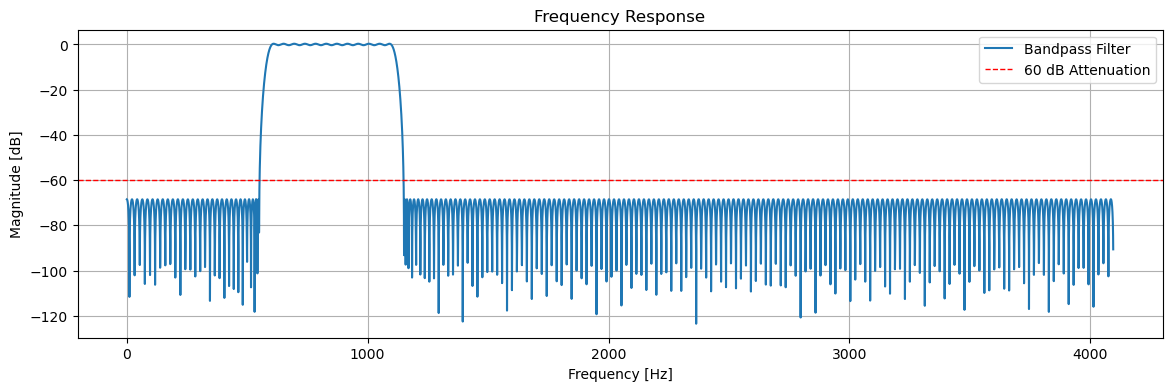

In [13]:
Fs = 8192  # Συχνότητα δειγματοληψίας
f1, f2 = 600, 1100  # Ζώνες διέλευσης
delta_f = 50  # Περιθώριο στις ζώνες αποκοπής για να διασφαλιστεί η επιθυμητή απόσβεση

# Καθορισμός των ζωνών για το φίλτρο
# Η δομή είναι [0, f_stop1, f_pass1, f_pass2, f_stop2, Fs/2]
bands = [0, f1 - delta_f, f1, f2, f2 + delta_f, 0.5*Fs]

# Επιθυμητές τιμές στις ζώνες: 0 για τις ζώνες αποκοπής και 1 για τις ζώνες διέλευσης
desired = [0, 1, 0]

# Καθορισμός των βαρών για κάθε ζώνη, ώστε να δώσουμε περισσότερη έμφαση στις ζώνες αποκοπής
weights = [100, 1, 100]

# Εκτίμηση του αριθμού των taps (τάξη του φίλτρου). Μπορεί να χρειαστεί προσαρμογή για βελτιστοποίηση.
numtaps = 400

# Σχεδιασμός του φίλτρου FIR με την εντολή remez
filter_taps = remez(numtaps, bands, desired, weight=weights, fs=Fs)

# Υπολογισμός της απόκρισης συχνότητας του φίλτρου
w, h = freqz(filter_taps, worN=8000, fs=Fs)

# Εμφάνιση της απόκρισης συχνότητας
plt.figure(figsize=(14, 4))
plt.plot(w, 20 * np.log10(abs(h)), label="Bandpass Filter")
plt.title('Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.axhline(-60, color='red', linestyle='--', label="60 dB Attenuation", linewidth=1)
plt.legend()
plt.show()

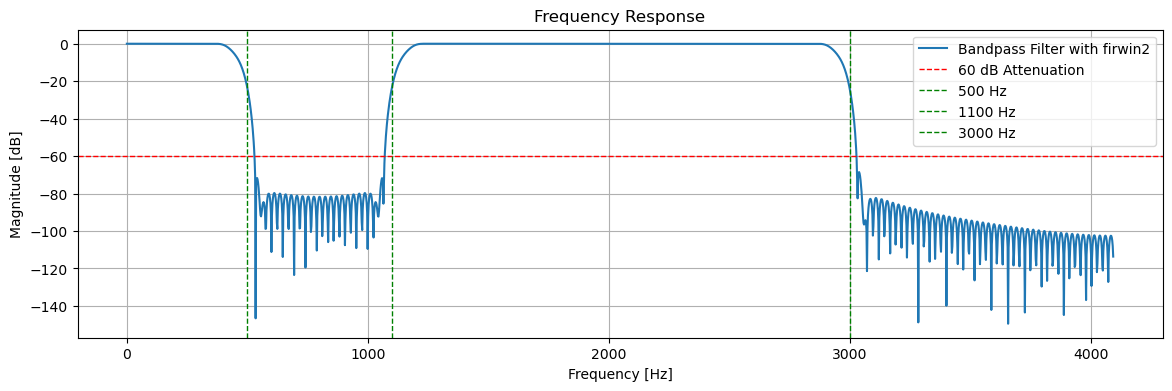

In [14]:
Fs = 8192  # Sampling frequency

# Define our target frequency response.
# We want to pass frequencies between 0-500 Hz and 1100-3000 Hz.
target_freqs = [0, 400, 500, 1100, 1200, 2900, 3000, Fs/2]
target_response = [1, 1, 0, 0, 1, 1, 0, 0]  # 1 in passbands, 0 in stopbands

# Trying with an increased filter order
numtaps = 350  # Adjust the filter order as needed

# Design the FIR filter using the firwin2 function
filter_taps = firwin2(numtaps, target_freqs, target_response, fs=Fs)

# Calculate the frequency response of the filter
w, h = freqz(filter_taps, worN=2000, fs=Fs)

# Display the frequency response
plt.figure(figsize=(14, 4))
plt.plot(w, 20 * np.log10(abs(h)), label="Bandpass Filter with firwin2")
plt.title('Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.axhline(-60, color='red', linestyle='--', label="60 dB Attenuation", linewidth=1)
plt.axvline(500, color='green', linestyle='--', label="500 Hz", linewidth=1)
plt.axvline(1100, color='green', linestyle='--', label="1100 Hz", linewidth=1)
plt.axvline(3000, color='green', linestyle='--', label="3000 Hz", linewidth=1)
plt.legend()
plt.show()